### Modelo_tres. ( Mejorando modelo 0.2 )   OneHotEncoder & Normalizado & Desbalanceado

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from pylab import rcParams 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier 
from collections import Counter

In [83]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [84]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [85]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## LABEL ENCODER

In [86]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [87]:
lbl.fit_transform(df['tipo_gestor'])
lbl.fit_transform(df['esta_carterizado'])
lbl.fit_transform(df['cliente_bbp'])
lbl.fit_transform(df['cartera_patron'])
lbl.fit_transform(df['digital_3_meses'])
lbl.fit_transform(df['camino_digital'])
lbl.fit_transform(df['marca_bp'])
lbl.fit_transform(df['marca_ccte'])
lbl.fit_transform(df['seg_valor'])
lbl.fit_transform(df['seg_recorrido'])


array([1, 0, 1, ..., 3, 3, 0])

In [88]:
df['tipo_gestor_etiqueta']=lbl.fit_transform(df['tipo_gestor'])
df['esta_carterizado_etiqueta']=lbl.fit_transform(df['esta_carterizado'])
df['cliente_bbp_etiqueta']=lbl.fit_transform(df['cliente_bbp'])
df['cartera_patron_etiqueta']=lbl.fit_transform(df['cartera_patron'])
df['digital_3_meses_etiqueta']=lbl.fit_transform(df['digital_3_meses'])
df['camino_digital_etiqueta']=lbl.fit_transform(df['camino_digital'])
df['marca_bp_etiqueta']=lbl.fit_transform(df['marca_bp'])
df['marca_ccte_etiqueta']=lbl.fit_transform(df['marca_ccte'])
df['seg_valor_etiqueta']=lbl.fit_transform(df['seg_valor'])
df['seg_recorrido_etiqueta']=lbl.fit_transform(df['seg_recorrido'])

In [89]:
df['seg_recorrido_etiqueta'].value_counts()

0    163991
2    149923
1    127889
3      9571
Name: seg_recorrido_etiqueta, dtype: int64

In [90]:
df['seg_recorrido_etiqueta'].value_counts()

0    163991
2    149923
1    127889
3      9571
Name: seg_recorrido_etiqueta, dtype: int64

In [91]:
df.dtypes;

In [92]:

df.drop(['tipo_gestor','esta_carterizado','cliente_bbp','cartera_patron','digital_3_meses','camino_digital',
         'marca_bp','marca_ccte','seg_valor','seg_recorrido'],axis = 1,inplace = True)

In [93]:
df.columns

Index(['cliente', 'saldo_captacion', 'gestor', 'codigo_cartera',
       'saldo_financiacion', 'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'edad', 'dz',
       'oficina', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

In [94]:
# Convierto variables a object
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);
df['edad']=df['edad'].astype(int)

In [95]:
df.dtypes

cliente                       object
saldo_captacion              float64
gestor                        object
codigo_cartera                object
saldo_financiacion           float64
saldo_ffii                   float64
saldo_plp                    float64
lp_dom_ingresos                int64
lp_tjta_cto                    int64
lp_tjt_rev                     int64
lp_rbos                        int64
lp_of_int                      int64
edad                           int64
dz                            object
oficina                       object
lp_seg_vida                    int64
lp_seg_acc                     int64
lp_seg_salud                   int64
lp_seg_hogar                   int64
lp_seg_auto                    int64
tipo_gestor_etiqueta           int64
esta_carterizado_etiqueta      int64
cliente_bbp_etiqueta           int64
cartera_patron_etiqueta        int64
digital_3_meses_etiqueta       int64
camino_digital_etiqueta        int64
marca_bp_etiqueta              int64
m

In [96]:
df['lp_seg_hogar'].unique()

array([1, 0])

# OUTLIERS

In [97]:
posibles_variables_con_outliers = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp']]

,edad,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp
count,451374.000000,4.513740e+05,4.513740e+05,4.513740e+05,451374.000000
mean,58.268941,4.971455e+04,1.380668e+04,8.483663e+03,1728.478326
std,19.018368,8.792364e+04,4.296438e+04,3.844671e+04,10780.622435
min,0.000000,-5.104332e+04,-4.900000e+03,0.000000e+00,0.000000
25%,45.000000,1.813182e+03,0.000000e+00,0.000000e+00,0.000000
50%,60.000000,1.520828e+04,0.000000e+00,0.000000e+00,0.000000
75%,73.000000,6.446964e+04,6.841775e+02,0.000000e+00,0.000000
max,118.000000,5.290216e+06,2.896317e+06,3.130940e+06,459937.460000


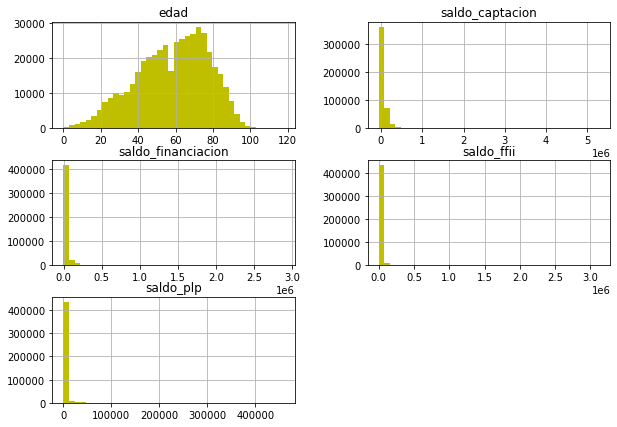

In [98]:
# Variable ffii. No contiene outliers. Son valores reales. La mayoria de los clientes no tienen saldos en ffii.
# Variable plp.  No contiene outliers. Son valores reales. La mayoria de los clientes no tienen saldos en plp.
# Variable Captacion. No tiene outliers. Son valores reales. Solamente modificamos los negativos a la media.
# Variable saldo Fin. No tiene outliers. Son valores reales.Solamente modificamos los negativos a la media
# Variable edad. Es la unica que puede tener ouliers reales.  Estidiamos y esos ouliers le damos valor de media.
posibles_variables_con_outliers.hist(figsize = (10,7), color = 'y', bins = 40);
posibles_variables_con_outliers.describe()

## OUTLIER EDAD

Boxplot edad


count    451374.000000
mean         58.268941
std          19.018368
min           0.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         118.000000
Name: edad, dtype: float64

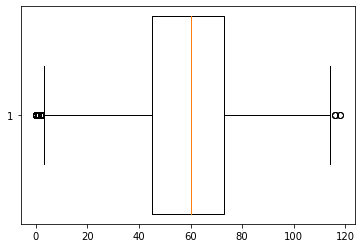

In [99]:
# Hacemos una primera visualizacion
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False,widths = 2)
plt.show   
df['edad'].describe()

In [100]:
print ('Cuartiles edad')
print('='*30)
Q1 = df['edad'].quantile(0.25)
print ('Primer cuartil',Q1)
print('='*30)
Q3 = df['edad'].quantile(0.75)
print ('Tercer cuartil',Q3)
print('='*30)
rangointercuartil = (Q3 - Q1)
print ('Rango_intercuartil',rangointercuartil)
print('='*30)
mediana = df['edad'].median()
print ('Mediana', mediana)
print('='*30)
minimo = df['edad'].min()
print ('Minimo', minimo)
print('='*30)
maximo = df['edad'].max()
print ('Maximo', maximo)

Cuartiles edad
Primer cuartil 45.0
Tercer cuartil 73.0
Rango_intercuartil 28.0
Mediana 60.0
Minimo 0
Maximo 118


In [101]:
#sacamos los extremos superiores e inferiores de los bigotes
print('='*30)
extremo_inferior = Q1 - 1.5 * rangointercuartil
print ('Extremo bigote_inferior', extremo_inferior)
print('='*30)
extremo_superior = Q3 + 1.5 * rangointercuartil
print ('Extremo bigote_superior', extremo_superior)
print('='*30)

Extremo bigote_inferior 3.0
Extremo bigote_superior 115.0


In [102]:
#detectamos los outliers
ubicacion_outliers = (df['edad'] < extremo_inferior) | (df['edad'] > extremo_superior)
#print ('ubicacion_outliers',ubicacion_outliers)

In [103]:
outliers = df['edad'][ubicacion_outliers]
outliers.count()
#print ('lista_outliers',outlier)

254

In [104]:
#detectamos tambien los NO outliers
resto_datos_no_outliers = (df['edad'] >= extremo_inferior) & (df['edad'] <= extremo_superior)
#print ('ubicacion_outliers',ubicacion_outliers)

In [105]:
no_outliers = df['edad'][resto_datos_no_outliers]
no_outliers.count()
#print ('lista_ubicacion_sin_outliers',sin_outlier)

451120

In [106]:
# No queremos eliminar los outliers ya que son muy pocos vs todo el df. Los transformamos a la media de edad
df['edad'] = df['edad'].where(df['edad']>3 ,df['edad'].mean())
df['edad'] = df['edad'].where(df['edad']<115 ,df['edad'].mean())

Boxplot edad


count    451374.000000
mean         58.324076
std          18.934848
min           4.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         114.000000
Name: edad, dtype: float64

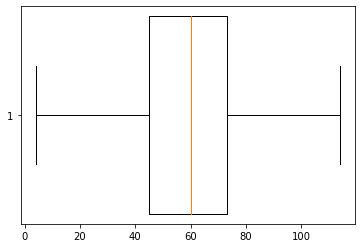

In [107]:
# Volvemos a hacer la  visualizacion
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False, widths = 2)
plt.show   
df['edad'].describe()

#  SALDO CAPTACION

In [108]:
# No queremos los valores negativos. Les damos valor de media.
df['saldo_captacion'].describe()

count    4.513740e+05
mean     4.971455e+04
std      8.792364e+04
min     -5.104332e+04
25%      1.813182e+03
50%      1.520828e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

In [109]:
# Hay 9439 clientes con saldo negativo . Solo el 2%
df[df['saldo_captacion'] < 0]['cliente'].nunique()

9440

In [110]:
df['cliente'].count()

451374

In [111]:
df[df['saldo_captacion'] < 0]['cliente'].nunique() / df['cliente'].count()

0.02091392060685817

In [112]:
# No queremos los valores negativos. Les damos valor de cero.
df[df['saldo_captacion'] < 0] = 0

In [113]:
# Sacamos nuvamente datos estadisticos..
df['saldo_captacion'].describe()

count    4.513740e+05
mean     4.971805e+04
std      8.792162e+04
min      0.000000e+00
25%      1.813182e+03
50%      1.520828e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

<AxesSubplot:>

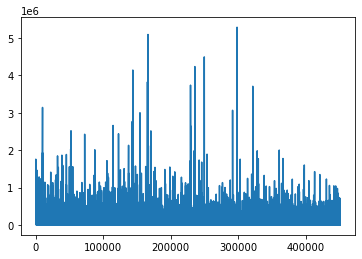

In [114]:
df['saldo_captacion'].plot()

#  SALDO FINANCIACION

In [115]:
# No queremos los valores negativos. Les damos valor de media.
df['saldo_financiacion'].describe()

count    4.513740e+05
mean     1.353979e+04
std      4.262430e+04
min     -4.900000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      6.066900e+02
max      2.896317e+06
Name: saldo_financiacion, dtype: float64

In [116]:
# Hay 9439 clientes con saldo negativo . Solo el 2%
df[df['saldo_financiacion'] < 0]['cliente'].nunique()

696

In [117]:
df['cliente'].count()

451374

In [118]:
df[df['saldo_financiacion'] < 0]['cliente'].nunique() / df['cliente'].count()

0.0015419585532175093

In [119]:
df[df['saldo_financiacion'] < 0] = 0

In [120]:
# No queremos los valores negativos. Les damos valor de cero.
df['saldo_financiacion'].describe()

count    4.513740e+05
mean     1.354013e+04
std      4.262418e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.066900e+02
max      2.896317e+06
Name: saldo_financiacion, dtype: float64

<AxesSubplot:>

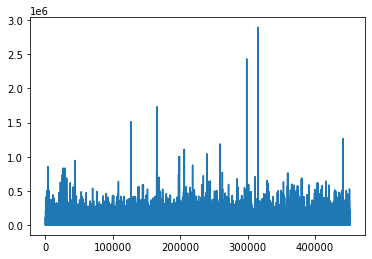

In [121]:
df['saldo_financiacion'].plot()

#  SALDO PLANES DE PENSION

In [122]:
df['saldo_plp'].describe()

count    451374.000000
mean       1720.115913
std       10755.266998
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      459937.460000
Name: saldo_plp, dtype: float64

<AxesSubplot:>

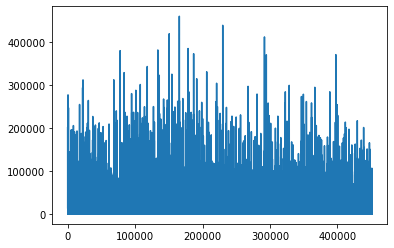

In [123]:
df['saldo_plp'].plot()

## __ADAPTAMOS EL DF SEGUN LAS VARIABLES QUE VAMOS A NECESITAR__



In [124]:
df.columns

Index(['cliente', 'saldo_captacion', 'gestor', 'codigo_cartera',
       'saldo_financiacion', 'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'edad', 'dz',
       'oficina', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

In [125]:
df = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp',
              'lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int',
              'lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar',
              'cartera_patron_etiqueta','digital_3_meses_etiqueta','camino_digital_etiqueta','marca_bp_etiqueta','marca_ccte_etiqueta',
              'seg_valor_etiqueta','seg_recorrido_etiqueta']]
               

In [126]:
df.describe()

,edad,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,...,lp_seg_salud,lp_seg_auto,lp_seg_hogar,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
count,451374.000000,4.513740e+05,4.513740e+05,4.513740e+05,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,...,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000
mean,57.296366,4.957242e+04,1.354013e+04,8.443670e+03,1720.115913,0.693447,0.543656,0.234265,0.856356,0.753249,...,0.004143,0.013645,0.129228,0.494051,0.496830,2.479751,0.278603,0.633902,0.718752,0.986862
std,20.613212,8.743404e+04,4.262418e+04,3.806693e+04,10755.266998,0.461063,0.498091,0.423539,0.350728,0.431121,...,0.064232,0.116012,0.335452,0.806837,0.499991,1.226279,0.448312,0.866855,0.883551,0.886218
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,1.788805e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,1.509917e+04,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,73.000000,6.427437e+04,6.066900e+02,0.000000e+00,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000
max,114.000000,5.096383e+06,2.896317e+06,2.848191e+06,459937.460000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000


In [127]:
df.dtypes

edad                        float64
saldo_captacion             float64
saldo_financiacion          float64
saldo_ffii                  float64
saldo_plp                   float64
lp_dom_ingresos               int64
lp_tjta_cto                   int64
lp_tjt_rev                    int64
lp_rbos                       int64
lp_of_int                     int64
lp_seg_vida                   int64
lp_seg_acc                    int64
lp_seg_salud                  int64
lp_seg_auto                   int64
lp_seg_hogar                  int64
cartera_patron_etiqueta       int64
digital_3_meses_etiqueta      int64
camino_digital_etiqueta       int64
marca_bp_etiqueta             int64
marca_ccte_etiqueta           int64
seg_valor_etiqueta            int64
seg_recorrido_etiqueta        int64
dtype: object

In [128]:
#df_datos_numericos =  df.select_dtypes('number')

## NORMALIZACION

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
scaler = MinMaxScaler()

In [131]:
df_normalizado = scaler.fit_transform(df)

In [132]:
columnas_datos_numericos = df.columns

In [133]:
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_datos_numericos)

In [134]:
df_normalizado.head(3)

,edad,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,...,lp_seg_salud,lp_seg_auto,lp_seg_hogar,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
0,0.605263,0.260598,0.0,0.45682,0.031101,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.333333
1,0.710526,0.224126,0.0,0.39064,0.000000,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.000000
2,0.657895,0.224126,0.0,0.39064,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.75,0.0,1.0,0.0,0.333333


## PCA No mejoramos


In [135]:
from sklearn.decomposition import PCA

In [136]:
df_sin_target = df_normalizado.drop(['lp_seg_hogar'], axis = 1)

In [137]:
#Instanciamos objeto PCA y aplicamos
pca = PCA(20) # n = 10 ponemos como numero de pcas 10 
pca.fit(df_sin_target) # obtener los componentes principales
df_transforming = pca.transform(df_sin_target) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [138]:
pca.components_[5]

array([ 0.03865778,  0.0064198 , -0.0121036 ,  0.00251125,  0.0018527 ,
       -0.24420733,  0.28393665, -0.16512918, -0.20518622,  0.04852254,
       -0.48135731, -0.05712452, -0.00922022, -0.01870848, -0.02790242,
        0.0166263 , -0.25461317,  0.38562885, -0.1189153 ,  0.44952238,
       -0.34658427])

In [139]:
list(zip(df_sin_target.columns, df_transforming[0]))

[('edad', -1.0511399979794391),
 ('saldo_captacion', 0.22634828635251705),
 ('saldo_financiacion', 0.135299496565483),
 ('saldo_ffii', 0.26729552368437204),
 ('saldo_plp', 0.5500890111913036),
 ('lp_dom_ingresos', -0.10174484196765449),
 ('lp_tjta_cto', 0.044166767521695925),
 ('lp_tjt_rev', 0.03753192984058975),
 ('lp_rbos', -0.32672018832192307),
 ('lp_of_int', 0.39885865448825303),
 ('lp_seg_vida', -0.22553960392629488),
 ('lp_seg_acc', 0.00966112495798329),
 ('lp_seg_salud', -0.3083050621993351),
 ('lp_seg_auto', -0.1276464835765896),
 ('cartera_patron_etiqueta', 0.055018165594987185),
 ('digital_3_meses_etiqueta', -0.03534114206167871),
 ('camino_digital_etiqueta', -0.006268150333162006),
 ('marca_bp_etiqueta', 0.16446369080485101),
 ('marca_ccte_etiqueta', 0.4488890251587077),
 ('seg_valor_etiqueta', 0.12239446374596813)]

In [140]:
print("shape of X_pca", df_transforming.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:15]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada

shape of X_pca (451374, 20)
[2.67493261e-01 1.48262342e-01 1.10615526e-01 9.61410144e-02
 6.50334477e-02 5.14820528e-02 4.34486913e-02 4.08587758e-02
 3.83051216e-02 3.31243719e-02 3.08642658e-02 2.65699885e-02
 2.34951797e-02 8.15522189e-03 8.04602315e-03 5.83750271e-03
 1.80357786e-03 2.39015332e-04 1.11752531e-04 7.99909691e-05]
suma: 0.991895283174887


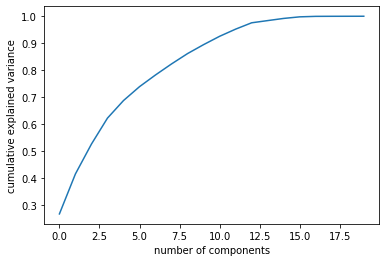

In [141]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show() 

In [142]:
df_pca = pd.DataFrame (data = df_transforming, columns = ['1','2','3','4','5','6','7','8','9',
                                                          '10','11','12','13','14','15','16',
                                                          '17','18','19','20'])

In [143]:
finalDf = pd.concat ([df_pca, df_normalizado [['lp_seg_hogar']]], axis = 1)

In [144]:
finalDf.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', 'lp_seg_hogar'],
      dtype='object')

In [145]:
finalDf = finalDf.drop(['15','16','17','18','19','20'], axis = 1)

## MODELO

In [146]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [147]:
finalDf.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', 'lp_seg_hogar'],
      dtype='object')

In [148]:
finalDf.dtypes
finalDf['lp_seg_hogar'] = finalDf['lp_seg_hogar'].astype(int)


In [149]:
X = finalDf.drop(['lp_seg_hogar'], axis = 1)
y= finalDf['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6319236 (451374, 14)
Datos y = 451374 (451374,)


In [150]:
X.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14'],
      dtype='object')

In [151]:
X.shape, y.shape

((451374, 14), (451374,))

In [152]:
#n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0
#clfgradient = GradientBoostingClassifier()


In [153]:
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [159]:
#clfgradient.fit(X_train,y_train)
clfxgboost = XGBClassifier(n_estimators=100,max_depth=4)

In [160]:
clfxgboost.fit(X_train, y_train)

/home/dsc/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [161]:
clfxgboost.predict_proba(X_test)[:, 1]

array([0.18571542, 0.23866971, 0.27433237, ..., 0.21497263, 0.38362086,
       0.08173112], dtype=float32)

[[77891   706]
 [10569  1109]]


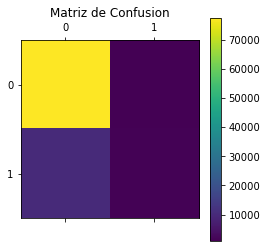

In [162]:
matriz_confusion_xgboost = confusion_matrix(y_test,clfxgboost.predict(X_test))
print(matriz_confusion_gradient)
pl.matshow(confusion_matrix(y_test,clfxgboost.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [163]:
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,clfxgboost.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfxgboost.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfxgboost.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfxgboost.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfxgboost.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, clfxgboost.predict(X_test)))

accuracy_score =  0.8763998892273609
precision = 0.6039168665067945
recall = 0.12938859393731802
f1_score = 0.21311706629055005
roc_auc_score = 0.853089071295326
classification_report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     78597
           1       0.60      0.13      0.21     11678

    accuracy                           0.88     90275
   macro avg       0.74      0.56      0.57     90275
weighted avg       0.85      0.88      0.84     90275



## GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
XGBClassifier()

GradientBoostingClassifier()

In [164]:
#n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0
xgboost_params = { 
        'n_estimators' : [100,125],
        'max_depth' : [3,4,5,6],
        'learning_rate': [0.03, 0.01, 0.003, 0.001],
        'min_child_weight': [1,3, 5,7, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 2.5, 5],
        'subsample': [0.6, 0.8, 1.0, 1.2, 1.4],
        'colsample_bytree': [0.6, 0.8, 1.0, 1.2, 1.4],
        'max_depth': [3, 4, 5, 6, 7, 8, 9 ,10, 12, 14],
        'reg_lambda':np.array([0.4, 0.6, 0.8, 1, 1.2, 1.4])
        }

xgboostgs = GridSearchCV(
        clfgradient,
        gradient_grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )

In [ ]:
xgboostgs.fit(X_train,y_train)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed: 161.2min


## Hacemos el modelo con los mejores parametros

In [ ]:
gradientgs.best_score_

In [ ]:
gradientgs.best_estimator_

In [ ]:
gradientgs.best_params_

In [ ]:
clfgradient = GradientBoostingClassifier()

In [ ]:
clfgradient.predict(X_test)

In [ ]:
clfgradient.predict_proba(X_test)[:, 1]

In [ ]:
matriz_confusion_gradient = confusion_matrix(y_test,clfgradient.predict(X_test))
print(matriz_confusion_gradient)
pl.matshow(confusion_matrix(y_test,clfgradient.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [ ]:
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,clfgradient.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfgradient.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfgradient.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfgradient.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfgradient.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, clfgradient.predict(X_test)))